# K-means clustring

In [3]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
# load dataset
df = sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
# model

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# import data in features
X = df[['age', 'fare']]
X['age'] = X['age'].fillna(value=X['age'].mean())

# scaled data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# perform clustring
model = KMeans(n_clusters=5)
model.fit(X_scaled)

# assign cluster to the data
df['cluster'] = model.labels_

C:\Users\KING\AppData\Local\Temp\ipykernel_14264\2421692066.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['age'] = X['age'].fillna(value=X['age'].mean())


In [6]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,cluster
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,4
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,2
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,2
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,2


In [7]:
df['cluster'].unique()

array([0, 4, 2, 1, 3], dtype=int32)

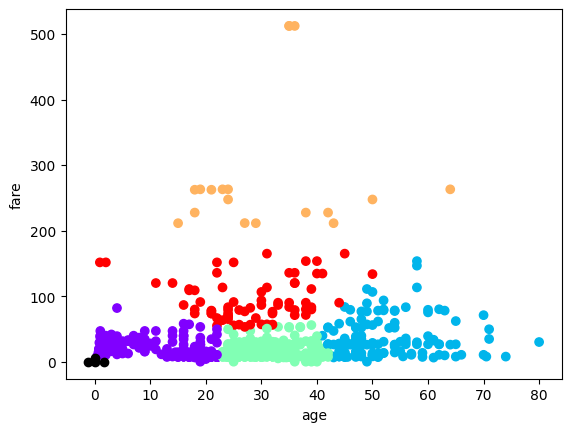

In [8]:
plt.scatter(df['age'], df['fare'], c=df['cluster'], cmap='rainbow')
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], color='black')
plt.xlabel("age")
plt.ylabel("fare")
plt.show()

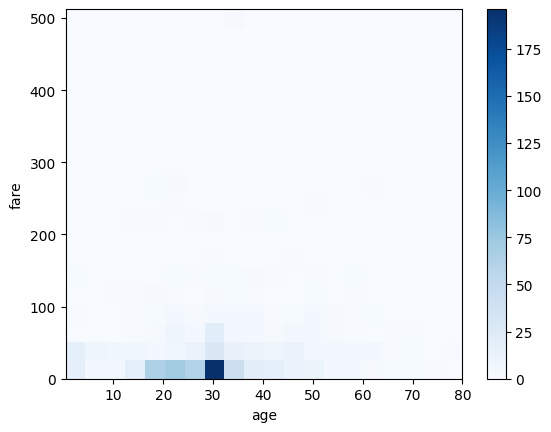

In [9]:
plt.figure()
plt.hist2d(X['age'], X['fare'], bins=20, cmap='Blues')
plt.colorbar()
plt.xlabel("age")
plt.ylabel("fare")
plt.show()

In [10]:
import plotly.express as px
fig = px.scatter(df, x='age', y='fare', color='cluster')
fig.show()

In [11]:
fig = px.scatter_3d(df, x='age', y='fare', z='pclass', color='cluster')
fig.show()

In [12]:
fig = px.parallel_coordinates(df, color='cluster', title='Titanic Clusters')
fig.show()

In [13]:
# saving the model
import joblib
joblib.dump(model, 'KMeansClustering.joblib')

['KMeansClustering.joblib']

In [14]:
# load the save model 
model_loaded = joblib.load('KMeansClustering.joblib')

In [15]:
import seaborn as sns
df_1 = sns.load_dataset('tips')
df_1

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [20]:
df_1.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [22]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [29]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(df_1['smoker'])

df_1['smoker'] = le.transform(df_1['smoker'])

In [31]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(df_1['day'])

df_1['day'] = le.transform(df_1['day'])

In [38]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(df_1['time'])

df_1['time'] = le.transform(df_1['time'])

In [39]:
df_1

,total_bill,tip,sex,smoker,day,time,size,smooker
0,16.99,1.01,Female,0,2,0,2,0
1,10.34,1.66,Male,0,2,0,3,0
2,21.01,3.50,Male,0,2,0,3,0
3,23.68,3.31,Male,0,2,0,2,0
4,24.59,3.61,Female,0,2,0,4,0
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,0,1,0,3,0
240,27.18,2.00,Female,1,1,0,2,1
241,22.67,2.00,Male,1,1,0,2,1
242,17.82,1.75,Male,0,1,0,2,0


In [40]:
X = df_1.drop(columns=['sex'])
y=df_1['sex']

In [41]:
X.head()

,total_bill,tip,smoker,day,time,size,smooker
0,16.99,1.01,0,2,0,2,0
1,10.34,1.66,0,2,0,3,0
2,21.01,3.50,0,2,0,3,0
3,23.68,3.31,0,2,0,2,0
4,24.59,3.61,0,2,0,4,0


In [42]:
y.head()

0    Female
1      Male
2      Male
3      Male
4    Female
Name: sex, dtype: category
Categories (2, object): ['Male', 'Female']

In [43]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier().fit(X,y)

In [44]:
joblib.dump(model, 'tipswalamodel.joblib')

['tipswalamodel.joblib']

In [45]:
model_1 = joblib.load('tipswalamodel.joblib')

In [46]:
import pickle

# save the model
with open("model.pkl", 'wb') as f:
    pickle.dump(model, f)

# load the model
with open('model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)